In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
df = pd.read_csv('data/cleaned.csv')

In [46]:
df.shape

(891, 9)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [49]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [50]:
num_feature,cat_feature

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Sex', 'Embarked'])

In [51]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [52]:
x = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

In [53]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Suppose these are your categorical columns
# Example:
# cat_columns = ['Gender', 'Country']

# 1. Define the Label/Ordinal Encoder
label_encoder = OrdinalEncoder()

# 2. Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('LabelEncoder', label_encoder, cat_feature)],
    remainder='passthrough'
)

# 3. Apply transformation
x_encoded = preprocessor.fit_transform(x)

# 4. Get final column names (same as original columns because label encoding doesn't create new features)
final_columns = cat_feature + [col for col in x.columns if col not in cat_feature]

# 5. Create a DataFrame
x_transformed = pd.DataFrame(x_encoded, columns=final_columns, index=x.index)
x.shape, x_transformed.shape


((891, 8), (891, 8))

In [54]:
x_transformed

,Sex,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,2.0,1.0,3.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,2.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,2.0,3.0,3.0,26.0,0.0,0.0,7.9250
3,0.0,2.0,4.0,1.0,35.0,1.0,0.0,53.1000
4,1.0,2.0,5.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
886,1.0,2.0,887.0,2.0,27.0,0.0,0.0,13.0000
887,0.0,2.0,888.0,1.0,19.0,0.0,0.0,30.0000
888,0.0,2.0,889.0,3.0,28.0,1.0,2.0,23.4500
889,1.0,0.0,890.0,1.0,26.0,0.0,0.0,30.0000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.2,random_state=42)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [58]:
# Model Training 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [60]:
logistic.fit(x_train,y_train)




e:\AIML\Elevate Labs\Submission\Assignment\elel\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred = logistic.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

score = accuracy_score(y_test,y_pred)
print(score)
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)
cm2 = confusion_matrix(y_pred,y_test)
print(cm2)
print(classification_report(y_test,y_pred))

0.7877094972067039
[[90 15]
 [23 51]]
[[90 23]
 [15 51]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

# pred based on prob

model_prob = logistic.predict_proba(x_test)
#let's calculate the scores 
dummy_model_prob = [0 for _ in range(len(y_test))]
model_prob = model_prob[:, 1]
dummy_model_acc = roc_auc_score(y_test,dummy_model_prob)
model_acc = roc_auc_score(y_test,model_prob)


dummy_fpr , dummy_tpr, _ = roc_curve(y_test,dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test,model_prob)

Text(0, 0.5, 'True Positive Rate ')

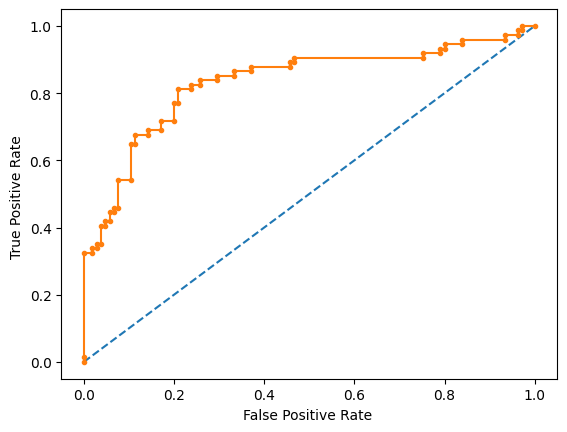

In [65]:
#plot the roc curves for model
plt.plot(dummy_fpr,dummy_tpr,linestyle='--')
plt.plot(model_fpr,model_tpr,marker='.')
#axis labels
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
